## Random Forest

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

### Prepare Data

In [2]:
nba = pd.read_csv("final_nba_data.csv")

In [3]:
nba = nba.dropna() # drop na rows

In [4]:
nba.columns.values

array(['Unnamed: 0', 'SEASON_ID', 'TEAM_ID_x', 'TEAM_ABBREVIATION_x',
       'TEAM_NAME_x', 'GAME_ID', 'GAME_DATE', 'MATCHUP_x', 'WL_x',
       'PTS_x', 'DAYS_BTWN_GAMES_x', 'WINS_10GAMES_x', 'WINS_UPTOGAME_x',
       'AVGPOINTS_2GAMES_x', 'AVGPOINTS_3GAMES_x', 'AVGPOINTS_4GAMES_x',
       'TEAM_ID_y', 'TEAM_ABBREVIATION_y', 'TEAM_NAME_y', 'MATCHUP_y',
       'WL_y', 'PTS_y', 'DAYS_BTWN_GAMES_y', 'WINS_10GAMES_y',
       'WINS_UPTOGAME_y', 'AVGPOINTS_2GAMES_y', 'AVGPOINTS_3GAMES_y',
       'AVGPOINTS_4GAMES_y', 'TOT_PTS', 'distance_miles', 'rivalry',
       'pre_PTS', 'OFFICIAL_ID', 'FIRST_NAME', 'LAST_NAME', 'JERSEY_NUM'],
      dtype=object)

In [5]:
nba.head()

,Unnamed: 0,SEASON_ID,TEAM_ID_x,TEAM_ABBREVIATION_x,TEAM_NAME_x,GAME_ID,GAME_DATE,MATCHUP_x,WL_x,PTS_x,...,AVGPOINTS_3GAMES_y,AVGPOINTS_4GAMES_y,TOT_PTS,distance_miles,rivalry,pre_PTS,OFFICIAL_ID,FIRST_NAME,LAST_NAME,JERSEY_NUM
492,8134,22016,1610612759,SAS,San Antonio Spurs,21600168,2016-11-16,SAS @ SAC,W,110,...,104.333333,102.25,215,1740.22,0.0,196.0,1204,Derek,Richardson,63
493,8135,22016,1610612759,SAS,San Antonio Spurs,21600168,2016-11-16,SAS @ SAC,W,110,...,104.333333,102.25,215,1740.22,0.0,196.0,1662,Bill,Kennedy,55
494,8136,22016,1610612759,SAS,San Antonio Spurs,21600168,2016-11-16,SAS @ SAC,W,110,...,104.333333,102.25,215,1740.22,0.0,196.0,202026,Karl,Lane,77
564,4800,22016,1610612750,MIN,Minnesota Timberwolves,21600190,2016-11-19,MIN @ MEM,L,71,...,97.666667,97.25,164,830.78,0.0,200.0,1664,Gary,Zielinski,59
565,4801,22016,1610612750,MIN,Minnesota Timberwolves,21600190,2016-11-19,MIN @ MEM,L,71,...,97.666667,97.25,164,830.78,0.0,200.0,1151,Sean,Corbin,33


In [6]:
nba = nba[[
    'SEASON_ID', 'GAME_DATE', 'TEAM_ABBREVIATION_x', 'DAYS_BTWN_GAMES_x', 'WINS_10GAMES_x',
    'WINS_UPTOGAME_x', 'AVGPOINTS_2GAMES_x', 'AVGPOINTS_3GAMES_x', 'AVGPOINTS_4GAMES_x',
    'TEAM_ABBREVIATION_y', 'DAYS_BTWN_GAMES_y', 'WINS_10GAMES_y', 
    'TOT_PTS', 'WINS_UPTOGAME_y', 'AVGPOINTS_2GAMES_y', 'AVGPOINTS_3GAMES_y','AVGPOINTS_4GAMES_y',
    'distance_miles', 'rivalry', 'pre_PTS' # not including official ID for time being because doesn't do much
]]

In [7]:
nba = nba.drop_duplicates()

In [8]:
nba.head()

,SEASON_ID,GAME_DATE,TEAM_ABBREVIATION_x,DAYS_BTWN_GAMES_x,WINS_10GAMES_x,WINS_UPTOGAME_x,AVGPOINTS_2GAMES_x,AVGPOINTS_3GAMES_x,AVGPOINTS_4GAMES_x,TEAM_ABBREVIATION_y,DAYS_BTWN_GAMES_y,WINS_10GAMES_y,TOT_PTS,WINS_UPTOGAME_y,AVGPOINTS_2GAMES_y,AVGPOINTS_3GAMES_y,AVGPOINTS_4GAMES_y,distance_miles,rivalry,pre_PTS
492,22016,2016-11-16,SAS,2.0,7.0,8.0,100.0,98.666667,98.75,SAC,5.0,3.0,215,4.0,105.5,104.333333,102.25,1740.22,0.0,196.0
564,22016,2016-11-19,MIN,2.0,4.0,4.0,109.0,114.333333,112.00,MEM,1.0,6.0,164,7.0,95.5,97.666667,97.25,830.78,0.0,200.0
684,22016,2016-11-25,GSW,2.0,9.0,13.0,134.5,131.000000,124.25,LAL,2.0,5.0,194,8.0,108.5,109.000000,108.50,367.92,0.0,214.0
711,22016,2016-11-25,WAS,4.0,4.0,4.0,108.5,112.000000,109.50,ORL,2.0,4.0,185,6.0,88.0,90.333333,90.00,846.67,0.0,174.0
735,22016,2016-11-27,CLE,2.0,8.0,12.0,132.5,123.000000,115.50,PHI,2.0,4.0,220,4.0,94.0,96.333333,102.25,431.24,0.0,203.0


In [9]:
# Create month variable for training
nba['GAME_DATE'] = pd.to_datetime(nba['GAME_DATE'])
nba['MONTH'] = nba['GAME_DATE'].dt.month

In [10]:
nba.head()

,SEASON_ID,GAME_DATE,TEAM_ABBREVIATION_x,DAYS_BTWN_GAMES_x,WINS_10GAMES_x,WINS_UPTOGAME_x,AVGPOINTS_2GAMES_x,AVGPOINTS_3GAMES_x,AVGPOINTS_4GAMES_x,TEAM_ABBREVIATION_y,...,WINS_10GAMES_y,TOT_PTS,WINS_UPTOGAME_y,AVGPOINTS_2GAMES_y,AVGPOINTS_3GAMES_y,AVGPOINTS_4GAMES_y,distance_miles,rivalry,pre_PTS,MONTH
492,22016,2016-11-16,SAS,2.0,7.0,8.0,100.0,98.666667,98.75,SAC,...,3.0,215,4.0,105.5,104.333333,102.25,1740.22,0.0,196.0,11
564,22016,2016-11-19,MIN,2.0,4.0,4.0,109.0,114.333333,112.00,MEM,...,6.0,164,7.0,95.5,97.666667,97.25,830.78,0.0,200.0,11
684,22016,2016-11-25,GSW,2.0,9.0,13.0,134.5,131.000000,124.25,LAL,...,5.0,194,8.0,108.5,109.000000,108.50,367.92,0.0,214.0,11
711,22016,2016-11-25,WAS,4.0,4.0,4.0,108.5,112.000000,109.50,ORL,...,4.0,185,6.0,88.0,90.333333,90.00,846.67,0.0,174.0,11
735,22016,2016-11-27,CLE,2.0,8.0,12.0,132.5,123.000000,115.50,PHI,...,4.0,220,4.0,94.0,96.333333,102.25,431.24,0.0,203.0,11


In [11]:
nba.columns.values

array(['SEASON_ID', 'GAME_DATE', 'TEAM_ABBREVIATION_x',
       'DAYS_BTWN_GAMES_x', 'WINS_10GAMES_x', 'WINS_UPTOGAME_x',
       'AVGPOINTS_2GAMES_x', 'AVGPOINTS_3GAMES_x', 'AVGPOINTS_4GAMES_x',
       'TEAM_ABBREVIATION_y', 'DAYS_BTWN_GAMES_y', 'WINS_10GAMES_y',
       'TOT_PTS', 'WINS_UPTOGAME_y', 'AVGPOINTS_2GAMES_y',
       'AVGPOINTS_3GAMES_y', 'AVGPOINTS_4GAMES_y', 'distance_miles',
       'rivalry', 'pre_PTS', 'MONTH'], dtype=object)

In [12]:
nba.shape

(2820, 21)

In [13]:
categorical_vars = pd.get_dummies(nba[[
    'SEASON_ID', 'TEAM_ABBREVIATION_x', 'TEAM_ABBREVIATION_y', 'MONTH'
]])

In [14]:
categorical_vars.head() # looks good

,SEASON_ID,MONTH,TEAM_ABBREVIATION_x_ATL,TEAM_ABBREVIATION_x_BKN,TEAM_ABBREVIATION_x_BOS,TEAM_ABBREVIATION_x_CHA,TEAM_ABBREVIATION_x_CHI,TEAM_ABBREVIATION_x_CLE,TEAM_ABBREVIATION_x_DAL,TEAM_ABBREVIATION_x_DEN,...,TEAM_ABBREVIATION_y_OKC,TEAM_ABBREVIATION_y_ORL,TEAM_ABBREVIATION_y_PHI,TEAM_ABBREVIATION_y_PHX,TEAM_ABBREVIATION_y_POR,TEAM_ABBREVIATION_y_SAC,TEAM_ABBREVIATION_y_SAS,TEAM_ABBREVIATION_y_TOR,TEAM_ABBREVIATION_y_UTA,TEAM_ABBREVIATION_y_WAS
492,22016,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
564,22016,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
684,22016,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
711,22016,11,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
735,22016,11,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [15]:
categorical_vars.shape

(2820, 62)

In [16]:
# add to df 
nba_trans = pd.concat([
    nba[[
        'GAME_DATE', 'DAYS_BTWN_GAMES_x', 'WINS_10GAMES_x',
        'WINS_UPTOGAME_x', 'AVGPOINTS_2GAMES_x', 'AVGPOINTS_3GAMES_x', 'AVGPOINTS_4GAMES_x',
        'WINS_10GAMES_y','DAYS_BTWN_GAMES_y', 'WINS_10GAMES_y',
        'WINS_UPTOGAME_y', 'AVGPOINTS_2GAMES_y', 'AVGPOINTS_3GAMES_y','AVGPOINTS_4GAMES_y',
        'TOT_PTS', 'distance_miles', 'rivalry', 'pre_PTS',
    ]], categorical_vars], axis=1)


In [17]:
nba_trans.head() # cool

,GAME_DATE,DAYS_BTWN_GAMES_x,WINS_10GAMES_x,WINS_UPTOGAME_x,AVGPOINTS_2GAMES_x,AVGPOINTS_3GAMES_x,AVGPOINTS_4GAMES_x,WINS_10GAMES_y,DAYS_BTWN_GAMES_y,WINS_10GAMES_y,...,TEAM_ABBREVIATION_y_OKC,TEAM_ABBREVIATION_y_ORL,TEAM_ABBREVIATION_y_PHI,TEAM_ABBREVIATION_y_PHX,TEAM_ABBREVIATION_y_POR,TEAM_ABBREVIATION_y_SAC,TEAM_ABBREVIATION_y_SAS,TEAM_ABBREVIATION_y_TOR,TEAM_ABBREVIATION_y_UTA,TEAM_ABBREVIATION_y_WAS
492,2016-11-16,2.0,7.0,8.0,100.0,98.666667,98.75,3.0,5.0,3.0,...,0,0,0,0,0,1,0,0,0,0
564,2016-11-19,2.0,4.0,4.0,109.0,114.333333,112.00,6.0,1.0,6.0,...,0,0,0,0,0,0,0,0,0,0
684,2016-11-25,2.0,9.0,13.0,134.5,131.000000,124.25,5.0,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0
711,2016-11-25,4.0,4.0,4.0,108.5,112.000000,109.50,4.0,2.0,4.0,...,0,1,0,0,0,0,0,0,0,0
735,2016-11-27,2.0,8.0,12.0,132.5,123.000000,115.50,4.0,2.0,4.0,...,0,0,1,0,0,0,0,0,0,0


Feature engineering -- let's try some non-linear transformations (log, square, cube)

In [18]:
nba_trans['AVGPOINTS_3GAMES_x_sq'] = np.square(nba['AVGPOINTS_3GAMES_x'])
nba_trans['AVGPOINTS_3GAMES_x_cube'] = np.power(nba['AVGPOINTS_3GAMES_x'], 3)
nba_trans['AVGPOINTS_3GAMES_x_log'] = np.log10(nba['AVGPOINTS_3GAMES_x'])
nba_trans['AVGPOINTS_4GAMES_x_sq'] = np.square(nba['AVGPOINTS_4GAMES_x'])
nba_trans['AVGPOINTS_4GAMES_x_cube'] = np.power(nba['AVGPOINTS_4GAMES_x'], 3)
nba_trans['AVGPOINTS_4GAMES_x_log'] = np.log10(nba['AVGPOINTS_4GAMES_x'])
nba_trans['AVGPOINTS_2GAMES_x_sq'] = np.square(nba['AVGPOINTS_2GAMES_x'])
nba_trans['AVGPOINTS_2GAMES_x_cube'] = np.power(nba['AVGPOINTS_2GAMES_x'], 3)
nba_trans['AVGPOINTS_2GAMES_x_log'] = np.log10(nba['AVGPOINTS_2GAMES_x'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
nba_trans['AVGPOINTS_3GAMES_y_sq'] = np.square(nba['AVGPOINTS_3GAMES_y'])
nba_trans['AVGPOINTS_3GAMES_y_cube'] = np.power(nba['AVGPOINTS_3GAMES_y'], 3)
nba_trans['AVGPOINTS_3GAMES_y_log'] = np.log10(nba['AVGPOINTS_3GAMES_y'])
nba_trans['AVGPOINTS_4GAMES_y_sq'] = np.square(nba['AVGPOINTS_4GAMES_y'])
nba_trans['AVGPOINTS_4GAMES_y_cube'] = np.power(nba['AVGPOINTS_4GAMES_y'], 3)
nba_trans['AVGPOINTS_4GAMES_y_log'] = np.log10(nba['AVGPOINTS_4GAMES_y'])
nba_trans['AVGPOINTS_2GAMES_y_sq'] = np.square(nba['AVGPOINTS_2GAMES_y'])
nba_trans['AVGPOINTS_2GAMES_y_cube'] = np.power(nba['AVGPOINTS_2GAMES_y'], 3)
nba_trans['AVGPOINTS_2GAMES_y_log'] = np.log10(nba['AVGPOINTS_2GAMES_y'])

In [20]:
nba_trans['pre_PTS_sq'] = np.square(nba['pre_PTS'])
nba_trans['pre_PTS_cube'] = np.power(nba['pre_PTS'], 3)
nba_trans['pre_PTS_log'] = np.log(nba['pre_PTS'])

In [21]:
nba_trans['AVGPOINTS_2GAMES_x_log'] = nba_trans['AVGPOINTS_2GAMES_x_log'].replace(-np.inf, np.nan)
nba_trans['AVGPOINTS_3GAMES_x_log'] = nba_trans['AVGPOINTS_3GAMES_x_log'].replace(-np.inf, np.nan)
nba_trans['AVGPOINTS_4GAMES_x_log'] = nba_trans['AVGPOINTS_4GAMES_x_log'].replace(-np.inf, np.nan)
nba_trans['AVGPOINTS_2GAMES_y_log'] = nba_trans['AVGPOINTS_2GAMES_y_log'].replace(-np.inf, np.nan)
nba_trans['AVGPOINTS_3GAMES_y_log'] = nba_trans['AVGPOINTS_3GAMES_y_log'].replace(-np.inf, np.nan)
nba_trans['AVGPOINTS_4GAMES_y_log'] = nba_trans['AVGPOINTS_4GAMES_y_log'].replace(-np.inf, np.nan)
nba_trans['pre_PTS_log'] = nba_trans['pre_PTS_log'].replace(-np.inf, np.nan)

In [22]:
nba_trans = nba_trans.dropna() # drop na rows from log

In [23]:
nba_trans.shape

(2788, 101)

### Fit Model

+ Training and test set selected at random, not prospectively

In [24]:
X = nba_trans.drop(['TOT_PTS', 'GAME_DATE'], axis = 1)

In [25]:
y = nba_trans['TOT_PTS']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 614)

In [27]:
X_train.head()

,DAYS_BTWN_GAMES_x,WINS_10GAMES_x,WINS_UPTOGAME_x,AVGPOINTS_2GAMES_x,AVGPOINTS_3GAMES_x,AVGPOINTS_4GAMES_x,WINS_10GAMES_y,DAYS_BTWN_GAMES_y,WINS_10GAMES_y,WINS_UPTOGAME_y,...,AVGPOINTS_3GAMES_y_log,AVGPOINTS_4GAMES_y_sq,AVGPOINTS_4GAMES_y_cube,AVGPOINTS_4GAMES_y_log,AVGPOINTS_2GAMES_y_sq,AVGPOINTS_2GAMES_y_cube,AVGPOINTS_2GAMES_y_log,pre_PTS_sq,pre_PTS_cube,pre_PTS_log
5744,2.0,5.0,24.0,86.0,93.666667,100.250000,5.0,2.0,5.0,30.0,...,1.973128,9702.25,955671.625,1.993436,8372.25,766060.875,1.961421,39601.0,7880599.0,5.293305
7505,2.0,2.0,2.0,116.5,114.666667,114.666667,1.0,2.0,1.0,1.0,...,2.096910,15625.00,1953125.000,2.096910,17822.25,2379270.375,2.125481,56169.0,13312053.0,5.468060
1937,2.0,6.0,28.0,104.0,108.000000,114.000000,3.0,2.0,3.0,21.0,...,1.997095,10609.00,1092727.000,2.012837,10506.25,1076890.625,2.010724,50176.0,11239424.0,5.411646
10307,2.0,5.0,16.0,107.0,102.333333,108.000000,5.0,2.0,5.0,30.0,...,2.030735,12100.00,1331000.000,2.041393,10506.25,1076890.625,2.010724,44944.0,9528128.0,5.356586
9455,2.0,3.0,20.0,100.0,104.666667,108.250000,8.0,2.0,8.0,33.0,...,2.070653,14762.25,1793613.375,2.084576,13110.25,1501123.625,2.058805,44521.0,9393931.0,5.351858


In [28]:
X_test.head()

,DAYS_BTWN_GAMES_x,WINS_10GAMES_x,WINS_UPTOGAME_x,AVGPOINTS_2GAMES_x,AVGPOINTS_3GAMES_x,AVGPOINTS_4GAMES_x,WINS_10GAMES_y,DAYS_BTWN_GAMES_y,WINS_10GAMES_y,WINS_UPTOGAME_y,...,AVGPOINTS_3GAMES_y_log,AVGPOINTS_4GAMES_y_sq,AVGPOINTS_4GAMES_y_cube,AVGPOINTS_4GAMES_y_log,AVGPOINTS_2GAMES_y_sq,AVGPOINTS_2GAMES_y_cube,AVGPOINTS_2GAMES_y_log,pre_PTS_sq,pre_PTS_cube,pre_PTS_log
7112,3.0,6.0,34.0,121.0,114.666667,121.00,4.0,2.0,4.0,41.0,...,2.007179,10251.5625,1.037971e+06,2.005395,10816.00,1124864.000,2.017033,51529.0,11697083.0,5.424950
6827,1.0,10.0,43.0,106.5,109.333333,113.25,6.0,2.0,6.0,37.0,...,2.029384,11772.2500,1.277289e+06,2.035430,10920.25,1141166.125,2.019116,40000.0,8000000.0,5.298317
4124,1.0,8.0,8.0,102.5,106.000000,106.50,2.0,1.0,2.0,2.0,...,2.041393,11881.0000,1.295029e+06,2.037426,12210.25,1349232.625,2.043362,57121.0,13651919.0,5.476464
5039,2.0,9.0,23.0,107.5,112.000000,114.75,6.0,3.0,6.0,15.0,...,2.038753,12376.5625,1.376893e+06,2.046300,12100.00,1331000.000,2.041393,45369.0,9663597.0,5.361292
3053,2.0,6.0,43.0,108.5,105.333333,103.75,4.0,1.0,4.0,13.0,...,2.060698,12155.0625,1.340096e+06,2.042379,12656.25,1423828.125,2.051153,41209.0,8365427.0,5.313206


Cross-validation with hyperparameter tuning:

In [29]:
rf_hp_tune = pd.DataFrame()

In [30]:
max_depth = 30
max_features = 30

This is very slow... Once I get a decent combination, then I'm not going to tune for each m

In [31]:
for i in range(25, max_depth + 1): # more tends to work, so starting high
    for j in range(25, max_features + 1): # more tends to work so starting high
        forest_clf = RandomForestRegressor(
            n_estimators = 100,
            random_state = 925,
            max_depth = i,
            max_features = j
        )
        scores = cross_val_score(forest_clf, X_train, y_train, cv = 5, scoring = 'r2') # fill in 
        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        rf_hp_tune = rf_hp_tune.append(pd.DataFrame([i, j, scores.mean()]).T)

In [32]:
rf_hp_tune.columns = ['max_depth', 'max_features', 'avg_r2']

In [33]:
rf_hp_tune

,max_depth,max_features,avg_r2
0,25.0,25.0,0.082834
0,25.0,26.0,0.072464
0,25.0,27.0,0.072921
0,25.0,28.0,0.074107
0,25.0,29.0,0.069510
0,25.0,30.0,0.074744
0,26.0,25.0,0.079040
0,26.0,26.0,0.076779
0,26.0,27.0,0.073836
0,26.0,28.0,0.072994


So we basically flaten out at around 0.76 for the best r-squared.

Now, take the combination that maximizes avg r-squared.

In [34]:
forest_clf = RandomForestRegressor(n_estimators = 100,
            random_state = 925,
            max_depth = 30,
            max_features = 26)
forest_clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features=26, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=925, verbose=0, warm_start=False)

#### Test Set Accuracy

In [35]:
forest_preds = forest_clf.predict(X_test)

In [36]:
plot_dat = pd.DataFrame({'Pred': forest_preds, 'Actual': y_test})

<Figure size 360x360 with 0 Axes>

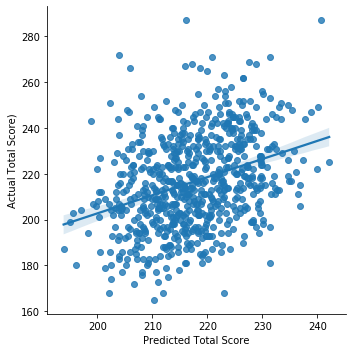

In [37]:
plt.figure(figsize = (5,5))
fig = sns.lmplot(x = 'Pred', y = 'Actual', data = plot_dat)
plt.xlabel("Predicted Total Score")
plt.ylabel("Actual Total Score)")
plt.savefig("rf_all.png")
plt.show(fig)

In [38]:
plot_dat.head(n = 10)

,Pred,Actual
7112,216.870000,200
6827,217.892727,231
4124,222.774359,217
5039,222.252500,235
3053,212.090000,193
10484,219.820000,198
1512,210.591667,177
6041,210.726667,212
8702,219.100000,181
3500,232.570000,231


In [39]:
np.sqrt(mean_squared_error(forest_preds, y_test)) # RMSE is only at about 8 points, which is too good to be true

19.39383622587238

So the RMSE is very low and we get most games absolutely correct. This seems too good to be true. I am going to split by time periods and try to predict march and april.

In [40]:
## Feature Importance
names = []
scores = []
for name, score in zip(X_train.columns,forest_clf.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df.sort_values('importance_score',ascending=False).head(n = 10)

,feature,importance_score
13,distance_miles,0.0394
9,WINS_UPTOGAME_y,0.0343
2,WINS_UPTOGAME_x,0.0317
5,AVGPOINTS_4GAMES_x,0.0300
82,AVGPOINTS_4GAMES_x_cube,0.0280
91,AVGPOINTS_4GAMES_y_cube,0.0278
90,AVGPOINTS_4GAMES_y_sq,0.0275
81,AVGPOINTS_4GAMES_x_sq,0.0272
92,AVGPOINTS_4GAMES_y_log,0.0267
83,AVGPOINTS_4GAMES_x_log,0.0264


### Moving-Window Approach

Test set results look better when we make only train on recent games and then predict for a few days. The idea here is that the DGP is dynamic, so training on data too far back and/or projecting too far forward will result in inaccurate predictions.

In [74]:
nba_train = nba_trans[(nba_trans['GAME_DATE'] >= '2019-01-01') & (nba_trans['GAME_DATE'] < '2019-01-14')] 

In [75]:
nba_test = nba_trans[(nba_trans['GAME_DATE'] >= '2019-01-14') & (nba_trans['GAME_DATE'] < '2019-01-16')] 

In [61]:
X_train3 = nba_train.drop(['GAME_DATE', 'TOT_PTS'], axis = 1)

In [62]:
y_train3 = nba_train['TOT_PTS']

In [63]:
X_test3 = nba_test.drop(['GAME_DATE', 'TOT_PTS'], axis = 1)

In [64]:
y_test3 = nba_test['TOT_PTS']

In [65]:
forest_clf3 = RandomForestRegressor(n_estimators = 100,
            random_state = 925,
            max_depth = 25,
            max_features = 25
)
forest_clf3.fit(X_train3, y_train3)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features=25, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=925, verbose=0, warm_start=False)

In [66]:
forest_preds3 = forest_clf3.predict(X_test3)

In [67]:
plot_dat3 = pd.DataFrame({'Pred': forest_preds3, 'Actual': y_test3})

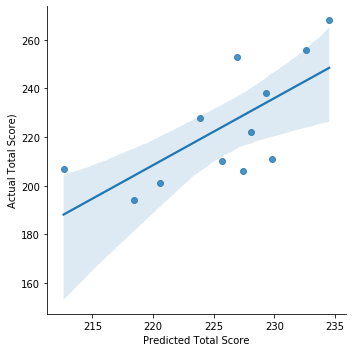

In [68]:
fig = sns.lmplot(x = 'Pred', y = 'Actual', data = plot_dat3)
plt.xlabel("Predicted Total Score")
plt.ylabel("Actual Total Score)")
plt.savefig("rf_small.png")
plt.show(fig)

Ok, that looks a bit better.

In [69]:
np.sqrt(mean_squared_error(forest_preds3, y_test3)) 

19.46747800820641

In [70]:
median_absolute_error(forest_preds3, y_test3)

19.189999999999998

In [71]:
X = sm.add_constant(forest_preds3)

In [72]:
print(sm.OLS(y_test3, X).fit().summary()) # r-squared is good

                            OLS Regression Results                            
Dep. Variable:                TOT_PTS   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     9.858
Date:                Sun, 31 May 2020   Prob (F-statistic):             0.0105
Time:                        16:05:05   Log-Likelihood:                -50.606
No. Observations:                  12   AIC:                             105.2
Df Residuals:                      10   BIC:                             106.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -397.5409    198.188     -2.006      0.0

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [73]:
## Feature Importance
names = []
scores = []
for name, score in zip(X_train3.columns,forest_clf3.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df.sort_values('importance_score',ascending=False).head(n = 10)

,feature,importance_score
2,WINS_UPTOGAME_x,0.0570
13,distance_miles,0.0541
97,pre_PTS_cube,0.0441
9,WINS_UPTOGAME_y,0.0390
98,pre_PTS_log,0.0384
15,pre_PTS,0.0354
92,AVGPOINTS_4GAMES_y_log,0.0322
10,AVGPOINTS_2GAMES_y,0.0317
96,pre_PTS_sq,0.0311
94,AVGPOINTS_2GAMES_y_cube,0.0306


In [126]:
fi = score_df.sort_values('importance_score',ascending=False).head(n = 10)

,feature,importance_score
2,WINS_UPTOGAME_x,0.0570
13,distance_miles,0.0541
97,pre_PTS_cube,0.0441
9,WINS_UPTOGAME_y,0.0390
98,pre_PTS_log,0.0384
15,pre_PTS,0.0354
92,AVGPOINTS_4GAMES_y_log,0.0322
10,AVGPOINTS_2GAMES_y,0.0317
96,pre_PTS_sq,0.0311
94,AVGPOINTS_2GAMES_y_cube,0.0306


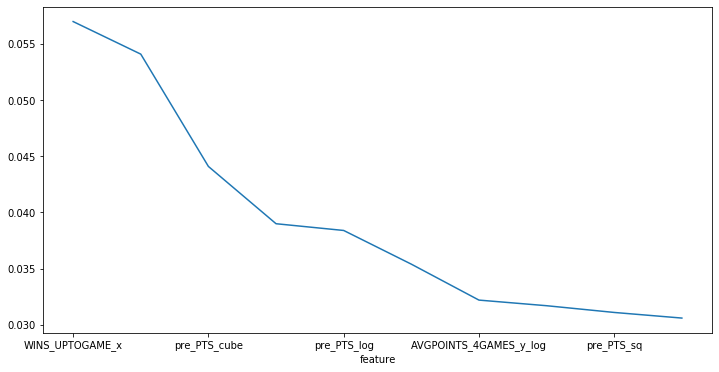

In [133]:
fi.plot('feature', 'importance_score', figsize=(12,6), legend=False);

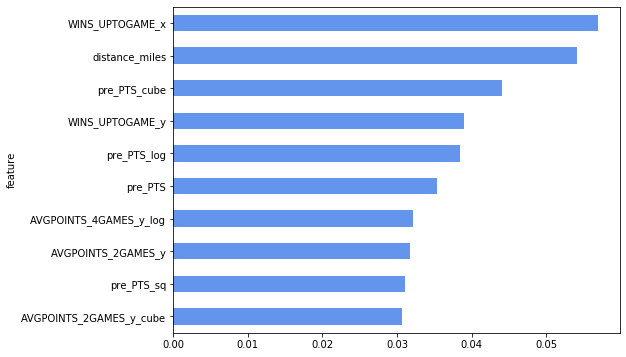

In [135]:
#fi.plot('feature', 'importance_score','barh', figsize=(12,6), legend=False, color='cornflowerblue')
fi2 = fi.sort_values('importance_score',ascending=True)
fi2.plot('feature', 'importance_score','barh', figsize=(8,6), legend=False, color='cornflowerblue')